# Siann Han WDS Project

Intro: As air pollution persists, air quality, especially in large cities, deteriorates. The air we breathe is often full of harmful miscrosopic particulates made of chemicals, allergens, dust, and smoke. Not only does air pollution affect the air we breathe, but it also has a large role in climate change. In order to study the relationship between these significant issues, I chose a dataset from kaggle containing information on daily air quality index (AQI) and weather factors such as wind speed and humidity in Shanghai from 2014-2021. In this project, I aimed to create a prediction model that could determine the monthly air AQI in Shanghai based on various weather variables in order to answer the question: How is air quality index affected by various weather factors?

dataset: https://www.kaggle.com/datasets/erhankul/shanghai-air-pollution-and-wheather-20142021?search=shanghai+AQI

#### Imports

In [262]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Data Exploration

In [263]:
shanghai_data = pd.read_csv('data/shanghai_AQI_and_weather_2014-2021.csv')
shanghai_data

,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained
0,2014-01-01,15.0,5.0,0.0,8.7,4.0,0.0,-1.0,11.0,12.0,...,0.0,43.0,0.0,1021.0,15.0,10.0,242.0,12.0,319.0,Hazardous
1,2014-01-02,14.0,7.0,0.0,8.7,4.0,2.0,4.0,11.0,13.0,...,3.0,60.0,0.0,1019.0,14.0,10.0,141.0,14.0,352.0,Hazardous
2,2014-01-03,16.0,9.0,0.0,8.7,4.0,10.0,3.0,11.0,12.0,...,26.0,55.0,0.0,1017.0,16.0,10.0,295.0,14.0,338.0,Hazardous
3,2014-01-04,10.0,4.0,0.0,5.5,2.0,17.0,3.0,7.0,9.0,...,24.0,68.0,0.1,1022.0,10.0,10.0,169.0,14.0,355.0,Hazardous
4,2014-01-05,10.0,3.0,0.0,8.7,3.0,24.0,3.0,9.0,9.0,...,12.0,66.0,0.0,1024.0,10.0,10.0,117.0,6.0,343.0,Hazardous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,2021-01-26,12.0,10.0,0.0,4.0,3.0,88.0,7.0,10.0,11.0,...,91.0,77.0,1.1,1023.0,12.0,8.0,233.0,9.0,229.0,Very unhealthy
2498,2021-01-27,11.0,7.0,0.0,8.7,2.0,96.0,4.0,7.0,9.0,...,55.0,72.0,0.0,1024.0,11.0,10.0,49.0,11.0,200.0,Unhealthy
2499,2021-01-28,10.0,4.0,0.0,8.7,3.0,100.0,-5.0,5.0,8.0,...,16.0,44.0,0.0,1028.0,10.0,10.0,291.0,19.0,309.0,Hazardous
2500,2021-01-29,9.0,6.0,0.0,8.7,3.0,90.0,-9.0,5.0,7.0,...,0.0,32.0,0.0,1030.0,9.0,10.0,188.0,10.0,320.0,Hazardous


In [264]:
#isolating outcome (AQI) and sorting by datetime
shanghai_data.date = pd.to_datetime(shanghai_data['date'], format="%Y-%m-%d") 
shanghai_data_sorted = shanghai_data.sort_values(by= ["date"])
monthly = shanghai_data.groupby(shanghai_data['date'].dt.strftime('%Y-%m'))['AQI'].mean()
shanghai_data_month = pd.DataFrame(monthly)
outcome = shanghai_data_month.sort_values(by= ["date"])
outcome

,AQI
date,
2014-01,291.903226
2014-02,256.321429
2014-03,277.193548
2014-04,286.566667
2014-05,298.064516
...,...
2020-09,195.700000
2020-10,152.033333
2020-11,182.833333


In [265]:
#grouping weather factors and sorting by datetime
monthly = shanghai_data.groupby(shanghai_data['date'].dt.strftime('%Y-%m'))['mintempC', 'maxtempC', 'totalSnow_cm', 'sunHour', 'moon_illumination', 'uvIndex', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM','pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'].mean()
shanghai_data_month = pd.DataFrame(monthly)
used_factors = shanghai_data_month.sort_values(by= ["date"])
used_factors

/opt/conda/envs/gstem/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,mintempC,maxtempC,totalSnow_cm,sunHour,moon_illumination,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date,,,,,,,,,,,,,,,,,,,
2014-01,4.161290,10.548387,0.000000,7.783871,44.483871,2.709677,2.258065,6.290323,8.419355,6.290323,20.451613,26.806452,67.064516,0.203226,1025.935484,10.548387,9.741935,166.645161,14.354839
2014-02,4.071429,8.857143,0.014286,5.832143,47.464286,2.071429,3.392857,3.857143,6.892857,3.857143,25.000000,64.428571,79.285714,0.835714,1024.035714,8.857143,9.142857,167.035714,17.357143
2014-03,6.483871,14.290323,0.000000,9.651613,44.451613,3.354839,6.387097,9.451613,11.225806,9.451613,22.161290,39.161290,74.032258,0.748387,1021.806452,14.290323,9.677419,164.387097,15.193548
2014-04,10.933333,18.900000,0.000000,11.373333,44.300000,4.033333,11.500000,14.866667,15.433333,14.866667,19.233333,49.066667,79.400000,0.366667,1016.666667,18.900000,9.033333,141.033333,13.300000
2014-05,16.838710,25.032258,0.000000,12.212903,44.838710,5.354839,14.903226,21.903226,22.000000,21.258065,20.258065,42.096774,69.645161,0.587097,1011.483871,25.032258,9.483871,162.354839,14.193548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09,22.766667,28.100000,0.000000,10.136667,45.766667,6.033333,18.000000,27.200000,27.266667,25.333333,13.100000,47.900000,65.033333,2.646667,1012.000000,28.100000,9.600000,138.866667,10.366667
2020-10,17.500000,22.833333,0.000000,9.176667,48.833333,5.300000,12.266667,20.566667,21.100000,20.166667,14.066667,34.700000,60.933333,1.456667,1020.600000,22.833333,9.766667,96.133333,11.300000
2020-11,14.933333,19.400000,0.000000,6.603333,45.866667,4.566667,9.933333,17.000000,17.600000,16.833333,15.066667,45.700000,63.533333,0.783333,1024.533333,19.400000,9.600000,114.233333,11.900000


#### Determining relevant weather factors

/opt/conda/envs/gstem/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+04, tolerance: 1.590e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


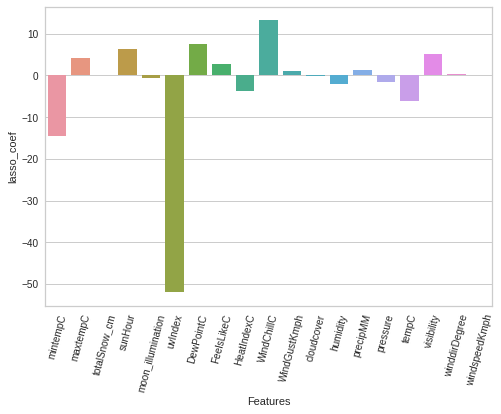

In [267]:
#visualizing lasso coefficients for each weather factor
names = used_factors.columns
lasso = Lasso(alpha=0.2)
lasso_coef = lasso.fit(used_factors, outcome).coef_

lasso_coef_data = pd.DataFrame({"Features":names,"lasso_coef": lasso_coef })
sns.barplot(data=lasso_coef_data, x= "Features", y = "lasso_coef")
plt.xticks(rotation = 75)
plt.show()

In [67]:
#lasso coefficients for each weather factor
lasso_coef = np.abs(lasso_coef)
lasso_Coef = pd.DataFrame({'Columns':names,'Coef':lasso_coef})
lasso_Coef

,Columns,Coef
0,mintempC,14.463026
1,maxtempC,4.136560
2,totalSnow_cm,0.000000
3,sunHour,6.248055
4,moon_illumination,0.708554
5,uvIndex,51.959595
6,DewPointC,7.613567
7,FeelsLikeC,2.803048
8,HeatIndexC,3.785199
9,WindChillC,13.212128


In [68]:
#dropping weather factors with lasso coefficients lower than 1
columns_to_be_deleted = lasso_Coef[lasso_Coef.Coef < 1].Columns; print(columns_to_be_deleted)

lasso_feature_x = used_factors.drop(columns_to_be_deleted,axis=1); lasso_feature_x.shape

2          totalSnow_cm
4     moon_illumination
10         WindGustKmph
11           cloudcover
17        winddirDegree
18        windspeedKmph
Name: Columns, dtype: object


(84, 13)

In [69]:
used_factors

,mintempC,maxtempC,totalSnow_cm,sunHour,moon_illumination,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date,,,,,,,,,,,,,,,,,,,
2014-01,4.161290,10.548387,0.000000,7.783871,44.483871,2.709677,2.258065,6.290323,8.419355,6.290323,20.451613,26.806452,67.064516,0.203226,1025.935484,10.548387,9.741935,166.645161,14.354839
2014-02,4.071429,8.857143,0.014286,5.832143,47.464286,2.071429,3.392857,3.857143,6.892857,3.857143,25.000000,64.428571,79.285714,0.835714,1024.035714,8.857143,9.142857,167.035714,17.357143
2014-03,6.483871,14.290323,0.000000,9.651613,44.451613,3.354839,6.387097,9.451613,11.225806,9.451613,22.161290,39.161290,74.032258,0.748387,1021.806452,14.290323,9.677419,164.387097,15.193548
2014-04,10.933333,18.900000,0.000000,11.373333,44.300000,4.033333,11.500000,14.866667,15.433333,14.866667,19.233333,49.066667,79.400000,0.366667,1016.666667,18.900000,9.033333,141.033333,13.300000
2014-05,16.838710,25.032258,0.000000,12.212903,44.838710,5.354839,14.903226,21.903226,22.000000,21.258065,20.258065,42.096774,69.645161,0.587097,1011.483871,25.032258,9.483871,162.354839,14.193548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09,22.766667,28.100000,0.000000,10.136667,45.766667,6.033333,18.000000,27.200000,27.266667,25.333333,13.100000,47.900000,65.033333,2.646667,1012.000000,28.100000,9.600000,138.866667,10.366667
2020-10,17.500000,22.833333,0.000000,9.176667,48.833333,5.300000,12.266667,20.566667,21.100000,20.166667,14.066667,34.700000,60.933333,1.456667,1020.600000,22.833333,9.766667,96.133333,11.300000
2020-11,14.933333,19.400000,0.000000,6.603333,45.866667,4.566667,9.933333,17.000000,17.600000,16.833333,15.066667,45.700000,63.533333,0.783333,1024.533333,19.400000,9.600000,114.233333,11.900000


#### Visualizing/understanding dataset

In [70]:
#splitting into train and test data for data visualization
used_factors = lasso_feature_x
x_train = used_factors.loc["2014-01":"2017-12"]
y_train = outcome.loc["2014-01":"2017-12"]

x_test = used_factors.loc["2018-01":"2019-10"]
y_test = outcome.loc["2018-01":"2019-10"]

In [71]:
x_training = x_train
x_training.insert(13,'AQI', y_train)
x_training

,mintempC,maxtempC,sunHour,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,humidity,precipMM,pressure,tempC,visibility,AQI
date,,,,,,,,,,,,,,
2014-01,4.161290,10.548387,7.783871,2.709677,2.258065,6.290323,8.419355,6.290323,67.064516,0.203226,1025.935484,10.548387,9.741935,291.903226
2014-02,4.071429,8.857143,5.832143,2.071429,3.392857,3.857143,6.892857,3.857143,79.285714,0.835714,1024.035714,8.857143,9.142857,256.321429
2014-03,6.483871,14.290323,9.651613,3.354839,6.387097,9.451613,11.225806,9.451613,74.032258,0.748387,1021.806452,14.290323,9.677419,277.193548
2014-04,10.933333,18.900000,11.373333,4.033333,11.500000,14.866667,15.433333,14.866667,79.400000,0.366667,1016.666667,18.900000,9.033333,286.566667
2014-05,16.838710,25.032258,12.212903,5.354839,14.903226,21.903226,22.000000,21.258065,69.645161,0.587097,1011.483871,25.032258,9.483871,298.064516
2014-06,20.233333,26.766667,12.240000,5.666667,19.633333,25.500000,25.500000,23.800000,79.200000,0.890000,1005.900000,26.766667,9.133333,251.200000
2014-07,23.677419,30.032258,12.603226,6.096774,24.387097,31.806452,31.806452,27.000000,86.354839,2.109677,1005.806452,30.032258,8.290323,216.838710
2014-08,22.903226,28.548387,11.229032,6.064516,23.709677,30.000000,30.193548,26.032258,87.709677,3.354839,1007.161290,28.548387,7.806452,205.903226
2014-09,21.066667,26.466667,10.050000,5.566667,21.133333,26.233333,26.333333,23.933333,85.200000,1.816667,1011.800000,26.466667,8.900000,202.433333


In [259]:
x_training.corr()

,mintempC,maxtempC,sunHour,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,humidity,precipMM,pressure,tempC,visibility,AQI
mintempC,1.000000,0.987267,0.733953,0.986261,0.985591,0.993431,0.991055,0.994015,0.552665,0.624983,-0.924466,0.987267,-0.458697,-0.803696
maxtempC,0.987267,1.000000,0.813762,0.995415,0.979971,0.991163,0.987584,0.995449,0.529847,0.579348,-0.947717,1.000000,-0.425369,-0.763682
sunHour,0.733953,0.813762,1.000000,0.799745,0.738347,0.771668,0.768765,0.771691,0.322059,0.386928,-0.874509,0.813762,-0.345156,-0.414213
uvIndex,0.986261,0.995415,0.799745,1.000000,0.970301,0.991264,0.988534,0.993983,0.486055,0.563750,-0.929298,0.995415,-0.392581,-0.769988
DewPointC,0.985591,0.979971,0.738347,0.970301,1.000000,0.980092,0.976954,0.982216,0.672932,0.637938,-0.940021,0.979971,-0.539086,-0.791585
FeelsLikeC,0.993431,0.991163,0.771668,0.991264,0.980092,1.000000,0.999173,0.992881,0.526171,0.601687,-0.929449,0.991163,-0.434992,-0.775414
HeatIndexC,0.991055,0.987584,0.768765,0.988534,0.976954,0.999173,1.000000,0.987999,0.523297,0.603858,-0.926820,0.987584,-0.431704,-0.777931
WindChillC,0.994015,0.995449,0.771691,0.993983,0.982216,0.992881,0.987999,1.000000,0.527602,0.591275,-0.929321,0.995449,-0.429236,-0.774169
humidity,0.552665,0.529847,0.322059,0.486055,0.672932,0.526171,0.523297,0.527602,1.000000,0.557323,-0.612151,0.529847,-0.790627,-0.510210
precipMM,0.624983,0.579348,0.386928,0.563750,0.637938,0.601687,0.603858,0.591275,0.557323,1.000000,-0.647074,0.579348,-0.640543,-0.495590


<AxesSubplot:xlabel='mintempC', ylabel='AQI'>

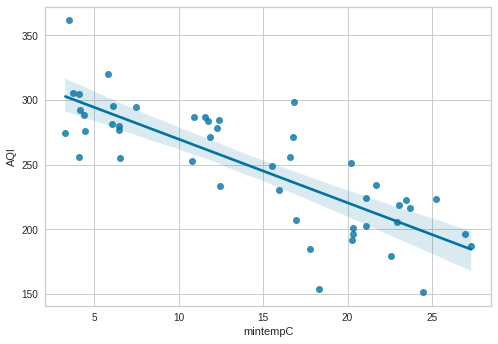

In [72]:
sns.regplot(x='mintempC', y= 'AQI', data=x_training)

<AxesSubplot:xlabel='maxtempC', ylabel='AQI'>

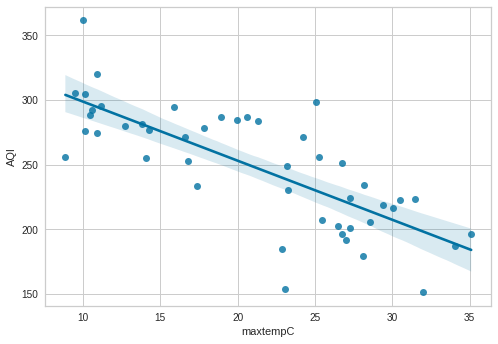

In [73]:
sns.regplot(x='maxtempC', y= 'AQI', data=x_training)

<AxesSubplot:xlabel='sunHour', ylabel='AQI'>

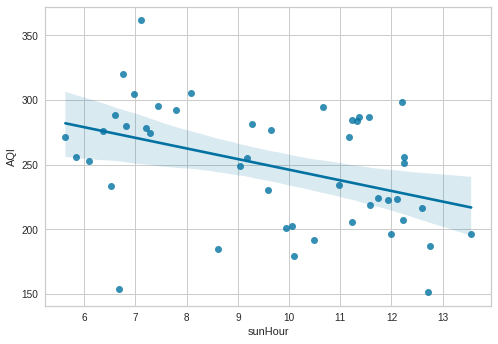

In [74]:
sns.regplot(x='sunHour', y= 'AQI', data=x_training)

<AxesSubplot:xlabel='uvIndex', ylabel='AQI'>

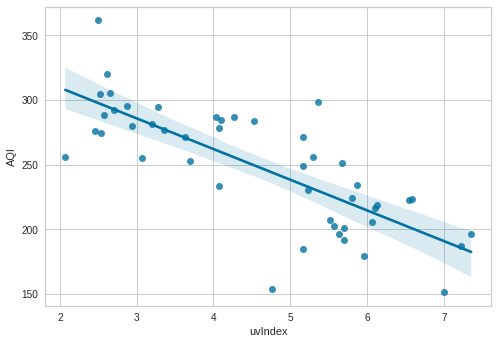

In [75]:
sns.regplot(x='uvIndex', y= 'AQI', data=x_training)

<AxesSubplot:xlabel='DewPointC', ylabel='AQI'>

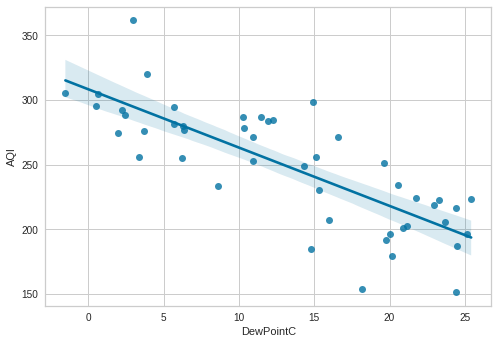

In [76]:
sns.regplot(x='DewPointC', y= 'AQI', data=x_training)

<AxesSubplot:xlabel='FeelsLikeC', ylabel='AQI'>

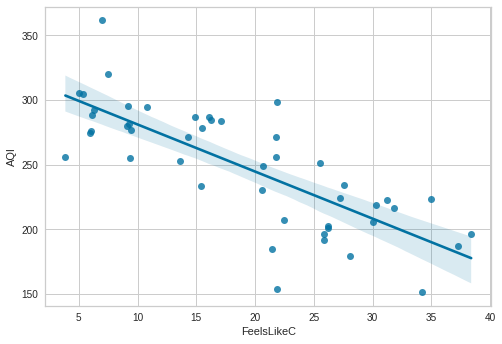

In [77]:
sns.regplot(x='FeelsLikeC', y= 'AQI', data=x_training)

<AxesSubplot:xlabel='HeatIndexC', ylabel='AQI'>

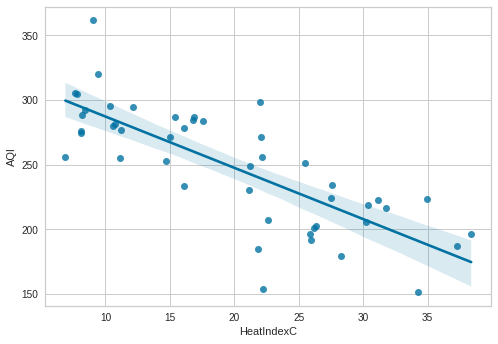

In [78]:
sns.regplot(x='HeatIndexC', y= 'AQI', data=x_training)

<AxesSubplot:xlabel='WindChillC', ylabel='AQI'>

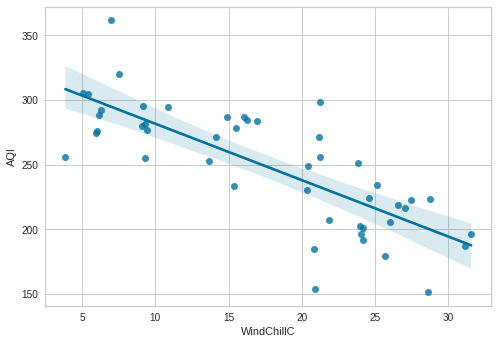

In [79]:
sns.regplot(x='WindChillC', y= 'AQI', data=x_training)

<AxesSubplot:xlabel='humidity', ylabel='AQI'>

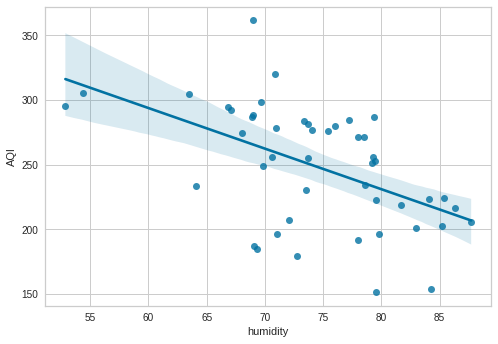

In [80]:
sns.regplot(x='humidity', y= 'AQI', data=x_training)

<AxesSubplot:xlabel='precipMM', ylabel='AQI'>

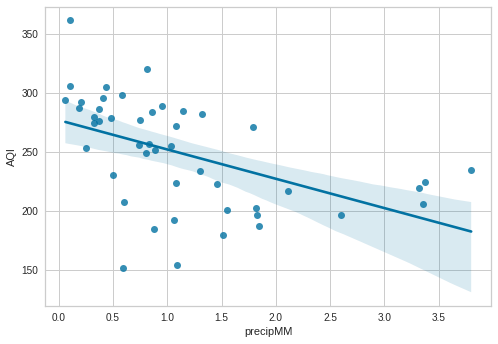

In [81]:
sns.regplot(x='precipMM', y= 'AQI', data=x_training)

<AxesSubplot:xlabel='pressure', ylabel='AQI'>

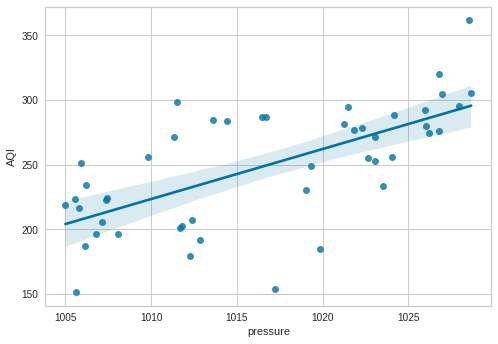

In [82]:
sns.regplot(x='pressure', y= 'AQI', data=x_training)

<AxesSubplot:xlabel='tempC', ylabel='AQI'>

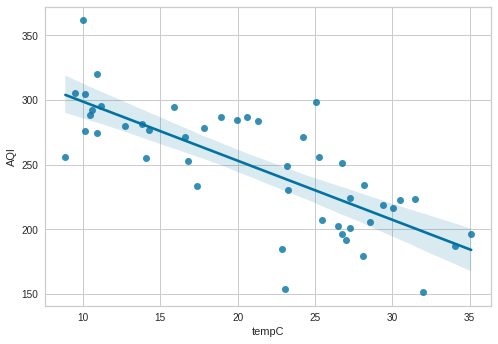

In [83]:
sns.regplot(x='tempC', y= 'AQI', data=x_training)

<AxesSubplot:xlabel='visibility', ylabel='AQI'>

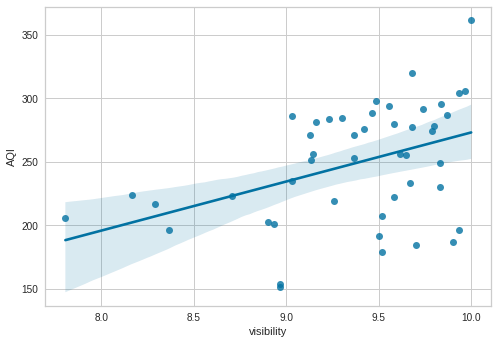

In [84]:
sns.regplot(x='visibility', y= 'AQI', data=x_training)

## Model Development

In [85]:
#splitting into test and train data
used_factors = lasso_feature_x
x_train = used_factors.loc["2014-01":"2017-12"]
y_train = outcome.loc["2014-01":"2017-12"]

x_test = used_factors.loc["2018-01":"2019-10"]
y_test = outcome.loc["2018-01":"2019-10"]

#### Linear Regression Model

In [222]:
#linear Regression Model

regression = LinearRegression()
lin_model = regression.fit(x_train,y_train)
y_predicted_sk_simple = regression.predict(x_test)
score_reg = regression.score(x_test,y_test)

m = lin_model.coef_[0]
b = lin_model.intercept_

#### Ridge Regression Model

In [249]:
#Ridge Regression Model
def Ridge_Regression (x_train,y_train,x_test,y_test):
    from sklearn.linear_model import Ridge
    
    Alpha_array = []
    Score_array = []
    mmm = []
    bbb = []
    for alpha in range (1,9):

        ridge = Ridge(alpha=(alpha/10),normalize=True)
        ridge_model = ridge.fit(x_train,y_train)
        ridge_pred = ridge.predict(x_test)
        score_ridge = ridge.score (x_test,y_test)
        Score_array.append(score_ridge) 
        Alpha_array.append(alpha/10)
        m1 = ridge_model.coef_[0]
        b1 = ridge_model.intercept_
        print ("alpha = ", str(alpha), '\n', "Score = ", str(score_ridge), '\n', "m param (Coefficient): ", m1, '\n', "b param (Y-int): ", b1)

    score_ridge_df = pd.DataFrame({"Scores": Score_array,"Alpha":Alpha_array})
    Score_ridge = score_ridge_df[score_ridge_df["Scores"] == score_ridge_df.Scores.max()]
    np_Score_ridge = Score_ridge.to_numpy()
    
      
    ridge = Ridge(alpha=np_Score_ridge[0,1],normalize=True)
    ridge_model = ridge.fit(x_train,y_train)
    ridge_pred = ridge.predict(x_test)
    
    
    return np_Score_ridge[0,0] , ridge_pred, ridge_model

#### Lasso Regression Model

In [250]:
#Lasso Regression Model
def Lasso_Regression (x_train,y_train,x_test,y_test):
    from sklearn.linear_model import Lasso

    Alpha_array = []
    Score_array = []
    for alpha in range (1,10):
        lasso = Lasso(alpha=(alpha/10),normalize=True)
        lasso_model = lasso.fit(x_train,y_train)
        lasso_pred = lasso.predict(x_test)
        score_lasso = lasso.score (x_test,y_test)
        Score_array.append(score_lasso) 
        Alpha_array.append(alpha/10)
        m2 = lasso_model.coef_[0]
        b2 = lasso_model.intercept_
        
        print ("alpha = ", str(alpha), '\n', "Score = ", str(score_lasso), '\n', "m param (Coefficient): ", m2,  '\n', "b param (Y-int): ", b2)
    score_lasso_df = pd.DataFrame({"Scores": Score_array,"Alpha":Alpha_array})      
        
    Score_lasso = score_lasso_df[score_lasso_df["Scores"] == score_lasso_df.Scores.max()]
    
    np_Score_Lasso = Score_lasso.to_numpy()

    lasso = Lasso(alpha=np_Score_Lasso[0,1] , normalize=True)
    lasso.fit(x_train,y_train)
    lasso_pred = lasso.predict(x_test)
    return np_Score_Lasso[0,0] , lasso_pred

## Model Assessment

In [251]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [252]:
#visualization imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import PredictionError, ResidualsPlot

#### Linear Regression Model Assessment

In [253]:
#R^2, m, b
score_reg = lin_model.score(x_test,y_test)
print('Linear Model Score:', score_reg,'\n', 'm param (Coefficient): ', m,  '\n', 'b param (y-Intercept): ', b)

Linear Model Score: -0.49309317474320324 
 m param (Coefficient):  [-12.91464483 -12.03945962   9.23285172 -26.64516456 -27.37091485
   1.1794449    9.35074298  40.64086681   7.0708502    3.06977722
  -5.10934157 -12.03945962  37.53684887] 
 b param (y-Intercept):  [4724.9366491]


In [254]:
#computing MSE
outcome['error'] = y_predicted_sk_simple - y_test
outcome['error_squared'] = outcome['error']**2

print('Linear Model MSE: ', np.mean(outcome['error_squared']))

Linear Model MSE:  1771.1438123545872


/opt/conda/envs/gstem/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


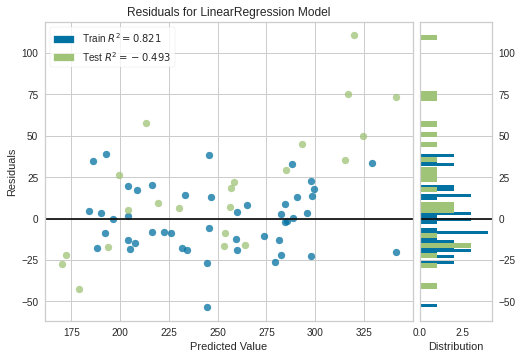

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [255]:
#visualizing regression model
visualizer = ResidualsPlot(regression)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.poof()

#### Ridge Regression Model Assessment

In [256]:
#alpha, score, m, b

print("Ridge Regression")
score_ridge , ridge_pred = Ridge_Regression(x_train,y_train,x_test,y_test)

Ridge Regression
alpha =  1 
 Score =  0.37135332060682513 
 m param (Coefficient):  [-1.39183916 -0.82747478  6.66539059 -5.83162441 -0.75966088 -0.40892355
 -0.67239929 -0.40025851 -0.15215402  1.93447636 -0.74693686 -0.82747478
  9.84755172] 
 b param (Y-int):  [979.59781872]
alpha =  2 
 Score =  0.46085124225451524 
 m param (Coefficient):  [-1.12687999 -0.66472495  5.30336092 -4.48834141 -0.71677729 -0.47764597
 -0.63052856 -0.53536634 -0.27153353  0.78024105 -0.47579582 -0.66472495
  6.79870754] 
 b param (Y-int):  [741.43673927]
alpha =  3 
 Score =  0.4916830302305808 
 m param (Coefficient):  [-0.99038953 -0.59805475  4.36990937 -3.90330358 -0.67570736 -0.47580603
 -0.59045866 -0.54795483 -0.32009077  0.0980131  -0.32443384 -0.59805475
  5.41103044] 
 b param (Y-int):  [605.42582436]
alpha =  4 
 Score =  0.5035267687259257 
 m param (Coefficient):  [-0.90032429 -0.55880351  3.68472372 -3.55281934 -0.64140306 -0.463194
 -0.55793128 -0.53958884 -0.34101236 -0.34385018 -0.22323

/opt/conda/envs/gstem/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/opt/conda/envs/gstem/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavio

ValueError: too many values to unpack (expected 2)

In [257]:
#computing MSE
outcome['Error1'] = y_test - ridge_pred
outcome['Error1_squared'] = outcome['Error1'] ** 2

print('Ridge Model MSE: ', np.mean(outcome['Error1_squared']))

Ridge Model MSE:  582.0799137553771


#### Lasso Regression Model Assessment

In [258]:
##alpha, score, m, b

print("Lasso Regression")
score_lasso , lasso_pred = Lasso_Regression(x_train,y_train,x_test,y_test)

Lasso Regression
alpha =  1 
 Score =  0.47610057750499046 
 m param (Coefficient):  -3.785403492049635 
 b param (Y-int):  [198.26051019]
alpha =  2 
 Score =  0.6477610566010452 
 m param (Coefficient):  -5.687657585686552 
 b param (Y-int):  [263.07527666]
alpha =  3 
 Score =  0.6428538219293591 
 m param (Coefficient):  -5.425831343720519 
 b param (Y-int):  [292.08278368]
alpha =  4 
 Score =  0.625737670905961 
 m param (Coefficient):  -5.086858929187557 
 b param (Y-int):  [310.46747806]
alpha =  5 
 Score =  0.6010888633905651 
 m param (Coefficient):  -4.755382151218269 
 b param (Y-int):  [315.07168059]
alpha =  6 
 Score =  0.5718566693451779 
 m param (Coefficient):  -4.423784238208722 
 b param (Y-int):  [319.6795969]
alpha =  7 
 Score =  0.5517547820801059 
 m param (Coefficient):  -4.181810459957483 
 b param (Y-int):  [321.05282615]
alpha =  8 
 Score =  0.5577674765049687 
 m param (Coefficient):  -4.122971731519285 
 b param (Y-int):  [315.80771472]
alpha =  9 
 Sco

/opt/conda/envs/gstem/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/opt/conda/envs/gstem/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previou